SQL Code:
1) Top 5 games and publisher is Nintendo
select * from my_table order by Global_Sales Desc limit 5

2) Calculate total sales by genre. Which genre generates the most revenue globally? Action - Total: 1751.18
SELECT 
    Genre,
    SUM(Global_Sales) AS Total_Global_Sales
FROM my_table
GROUP BY Genre
ORDER BY Total_Global_Sales DESC;

3) Find the average sales per game for each platform. Which platforms have the highest average? platform - GB
SELECT 
    Platform,
    AVG(Global_Sales) AS Avg_Sales_Per_Game
FROM my_table
GROUP BY Platform
ORDER BY Avg_Sales_Per_Game DESC;

4) Which publisher has released the most games? Do they also have the highest total sales? Electronic Arts 
SELECT 
    Publisher,
    COUNT(*) AS Num_Games
FROM my_table
GROUP BY Publisher
ORDER BY Num_Games DESC
LIMIT 1;

5) For games released after 2010, which genre dominated each region (NA, EU, JP)?
SELECT 
    Genre,
    SUM(NA_Sales) AS Total_NA_Sales,
    SUM(EU_Sales) AS Total_EU_Sales,
    SUM(JP_Sales) AS Total_JP_Sales,
    Year
FROM my_table
WHERE Year > '2010' and Year != 'N/A'
GROUP BY Year,Genre
ORDER BY Year,Genre;

6) Calculate the percentage of global sales that each region contributes. Which region is most important
SELECT 
    (SUM(NA_Sales)   / SUM(Global_Sales)) * 100 AS NA_Percentage,
    (SUM(EU_Sales)   / SUM(Global_Sales)) * 100 AS EU_Percentage,
    (SUM(JP_Sales)   / SUM(Global_Sales)) * 100 AS JP_Percentage,
    (SUM(Other_Sales) / SUM(Global_Sales)) * 100 AS Other_Percentage
FROM my_table;

7) Find games where Japanese sales exceed North American sales. What patterns do you notice about genre or publisher?
For Gene
SELECT 
    Genre,
    COUNT(*) AS Num_Games,
    SUM(JP_Sales) AS Total_JP_Sales
FROM my_table
WHERE JP_Sales > NA_Sales
GROUP BY Genre
ORDER BY Total_JP_Sales DESC;

For Publisher
SELECT 
    Publisher,
    COUNT(*) AS Num_Games,
    SUM(JP_Sales) AS Total_JP_Sales
FROM my_table
WHERE JP_Sales > NA_Sales
GROUP BY Publisher
ORDER BY Total_JP_Sales DESC;






In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#Import csv file

df = pd.read_csv('vgsales.csv')
df


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
#1) Top 5 games have the highest sales and what is the common 


top_5 = df.sort_values(by="Global_Sales", ascending=False).head(5)
top_5

# Publisher - Nintendo for all the top 5 games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
# nlargest -??
top_5 = df.nlargest(5, "Global_Sales")[["Name", "Platform", "Genre", "Publisher", "Global_Sales"]]
print(top_5)

                       Name Platform         Genre Publisher  Global_Sales
0                Wii Sports      Wii        Sports  Nintendo         82.74
1         Super Mario Bros.      NES      Platform  Nintendo         40.24
2            Mario Kart Wii      Wii        Racing  Nintendo         35.82
3         Wii Sports Resort      Wii        Sports  Nintendo         33.00
4  Pokemon Red/Pokemon Blue       GB  Role-Playing  Nintendo         31.37


In [11]:
# optional select only column names you want to show
top_5 = top_5[["Name", "Platform", "Genre", "Publisher", "Global_Sales"]]
print(top_5)            

                       Name Platform         Genre Publisher  Global_Sales
0                Wii Sports      Wii        Sports  Nintendo         82.74
1         Super Mario Bros.      NES      Platform  Nintendo         40.24
2            Mario Kart Wii      Wii        Racing  Nintendo         35.82
3         Wii Sports Resort      Wii        Sports  Nintendo         33.00
4  Pokemon Red/Pokemon Blue       GB  Role-Playing  Nintendo         31.37


In [ ]:
#2) Calculate total sales by genre.

genre_sales = df.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].sum().sort_values(by='Genre', ascending=False)
print (genre_sales)

              NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Genre                                                                
Strategy         68.70     45.34     49.46        11.36        175.12
Sports          683.35    376.85    135.37       134.97       1330.93
Simulation      183.31    113.38     63.70        31.52        392.20
Shooter         582.60    313.27     38.28       102.69       1037.37
Role-Playing    327.28    188.06    352.31        59.61        927.37
Racing          359.42    238.39     56.69        77.27        732.04
Puzzle          123.78     50.78     57.31        12.55        244.95
Platform        447.05    201.63    130.77        51.59        831.37
Misc            410.24    215.98    107.76        75.32        809.96
Fighting        223.59    101.32     87.35        36.68        448.91
Adventure       105.80     64.13     52.07        16.81        239.04
Action          877.83    525.00    159.95       187.38       1751.18


In [ ]:
#sort by optional

genre_sales = df.sort_values(by="Global_Sales", ascending=False)
print(genre_sales)

        Rank                                  Name Platform    Year  \
0          1                            Wii Sports      Wii  2006.0   
1          2                     Super Mario Bros.      NES  1985.0   
2          3                        Mario Kart Wii      Wii  2008.0   
3          4                     Wii Sports Resort      Wii  2009.0   
4          5              Pokemon Red/Pokemon Blue       GB  1996.0   
...      ...                                   ...      ...     ...   
16186  16189                           BattleForge       PC  2009.0   
16187  16190                        Jewel Quest II       PC  2007.0   
16188  16191                      Toro to Morimori      PS3  2009.0   
16189  16192  Sonic & All-Stars Racing Transformed       PC  2013.0   
16597  16600                      Spirits & Spells      GBA  2003.0   

              Genre                    Publisher  NA_Sales  EU_Sales  \
0            Sports                     Nintendo     41.49     29.02   
1  

In [14]:
#f you only care about total global sales per genre:

genre_global = df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)
print(genre_global)

Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64


In [18]:
#Group by Genre and sum the Global_Sales
genre_sales = df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)
print(genre_sales)

Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64


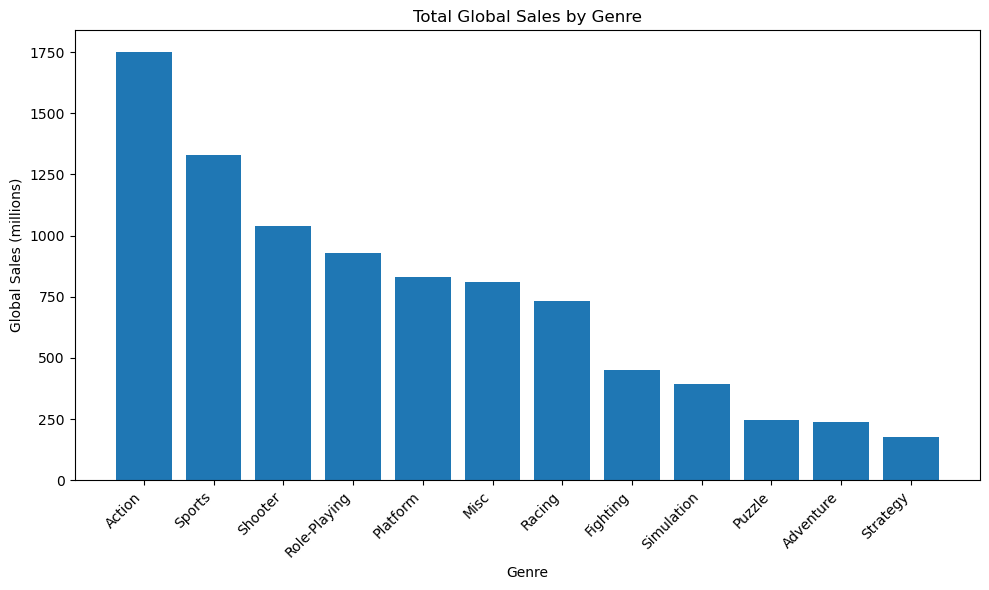

In [19]:
#plot bar chart
plt.figure(figsize=(10, 6))                 # Set figure size
plt.bar(genre_sales.index, genre_sales.values)  # Bar chart
plt.title("Total Global Sales by Genre")    # Chart title
plt.xlabel("Genre")                         # X-axis label
plt.ylabel("Global Sales (millions)")       # Y-axis label
plt.xticks(rotation=45, ha='right')         # Rotate labels for readability
plt.tight_layout()                          # Adjust layout to prevent cutoff
plt.show()

In [ ]:
#
